In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from IPython.display import clear_output
import time
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [36]:
df = pd.read_csv(r"D:\project\Advertising (1).csv",encoding="unicode escape")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [37]:
# =========================================
# STEP 1: Load your dataset
# =========================================

X = df[['TV','radio','newspaper']]
y = df['sales']


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)


In [38]:
X

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.62704048e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.07502697e+00],
       [ 6.66253447e-01,  6.50657027e-01,  7.11007392e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.02862691e+00],
       [-9.25304978e-01,  9.00494200e-01

In [39]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [40]:
def compute_loss(X, y, w, b):
    """Compute Mean Squared Error loss"""
    m = len(y)
    y_pred = np.dot(X, w) + b
    loss = (1 / (2 * m)) * np.sum((y_pred - y) ** 2)
    return loss

def gradient_descent(X, y, w_init, b_init, alpha, num_iters):
    """Perform gradient descent for n features"""
    m, n = X.shape
    w = w_init
    b = b_init

    w_history = []
    b_history = []
    loss_history = []

    print(f"\nStarting Gradient Descent:")
    print(f"Initial parameters: w = {w}, b = {b:.4f}")
    print(f"Learning rate: {alpha}, Iterations: {num_iters}")
    print("-" * 60)

    for i in range(num_iters):
        # Predictions
        y_pred = np.dot(X, w) + b

        # Gradients
        dw = (1 / m) * np.dot(X.T, (y_pred - y))
        db = (1 / m) * np.sum(y_pred - y)

        # Parameter update
        w = w - alpha * dw
        b = b - alpha * db

        # Compute loss
        loss = compute_loss(X, y, w, b)

        # Save history
        w_history.append(w.copy())
        b_history.append(b)
        loss_history.append(loss)

        # Print formatted progress
        if i % 50 == 0 or i == num_iters - 1:
            print(f"Iteration {i:4d}: w[:] = {w}, b = {b:.4f}, Cost = {loss:.4f}")

    print("-" * 60)
    print(f"Final parameters:\nw = {w}\nb = {b:.4f}")

    return np.array(w_history), np.array(b_history), np.array(loss_history), w, b

In [41]:
# =========================================
# STEP 3: Initialize and Run Gradient Descent
# =========================================
alpha = 0.01
iterations = 250

w_init = np.zeros(X.shape[1])
b_init = 0

w_history, b_history, loss_history, w, b = gradient_descent(
    X, y, w_init, b_init, alpha, iterations
)


Starting Gradient Descent:
Initial parameters: w = [0. 0. 0.], b = 0.0000
Learning rate: 0.01, Iterations: 250
------------------------------------------------------------
Iteration    0: w[:] = [0.04071006 0.02998891 0.01188159], b = 0.1402, Cost = 109.6334
Iteration   50: w[:] = [1.61274088 1.14984438 0.36017879], b = 5.6236, Cost = 40.6792
Iteration  100: w[:] = [2.54182891 1.77635654 0.42770435], b = 8.9411, Cost = 15.7476
Iteration  150: w[:] = [3.09367494 2.13992392 0.38641732], b = 10.9482, Cost = 6.6706
Iteration  200: w[:] = [3.42287994 2.35944301 0.3127875 ], b = 12.1626, Cost = 3.3457
Iteration  249: w[:] = [3.61697121 2.49512787 0.23985741], b = 12.8859, Cost = 2.1351
------------------------------------------------------------
Final parameters:
w = [3.61697121 2.49512787 0.23985741]
b = 12.8859


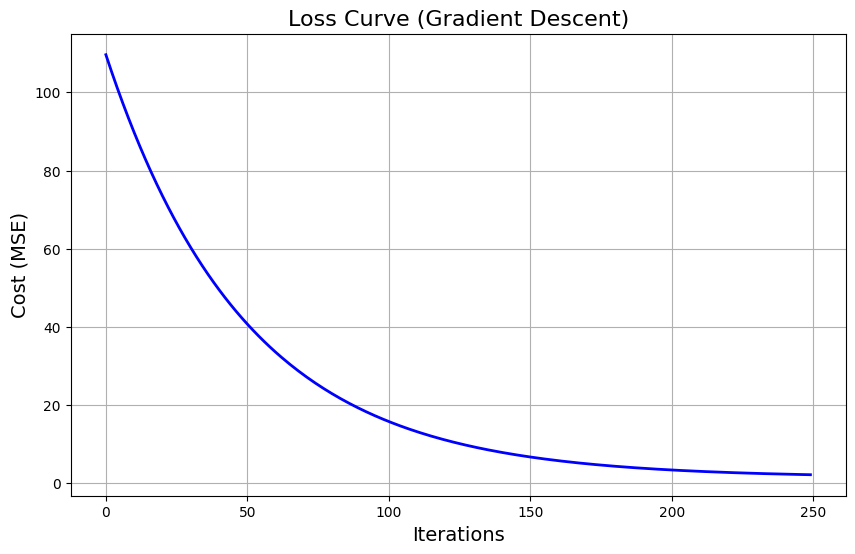

In [44]:

import matplotlib.pyplot as plt

# Plot Loss Curve
plt.figure(figsize=(10, 6))
plt.plot(range(len(loss_history)), loss_history, linewidth=2, color='blue')
plt.title("Loss Curve (Gradient Descent)", fontsize=16)
plt.xlabel("Iterations", fontsize=14)
plt.ylabel("Cost (MSE)", fontsize=14)
plt.grid(True)
plt.show()



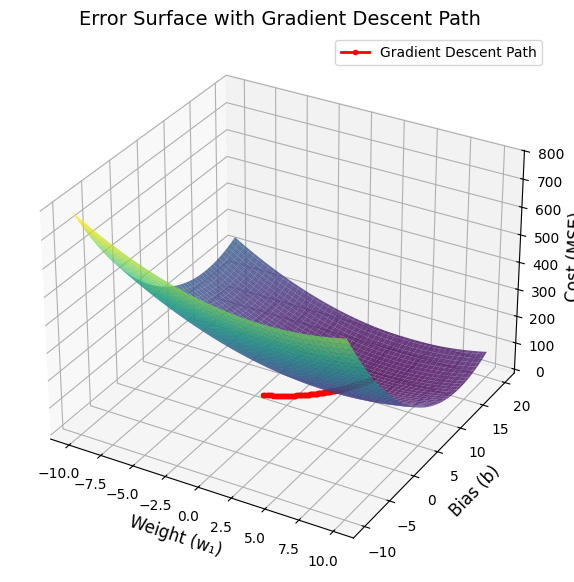

In [45]:
x_feature = X[:, 0]

# Create a grid of w and b values
w_range = np.linspace(-10, 10, 100)
b_range = np.linspace(-10, 20, 100)

W, B = np.meshgrid(w_range, b_range)

# Compute cost for each (w, b)
cost_surface = np.zeros_like(W)

for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        y_pred = W[i, j] * x_feature + B[i, j]
        cost_surface[i, j] = np.mean((y_pred - y) ** 2)

# 3D Error Surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
ax.plot_surface(W, B, cost_surface, cmap='viridis', alpha=0.8)

# Overlay gradient descent path
ax.plot(
    w_history[:, 0],   # first feature's weight
    b_history,
    loss_history,
    color='r',
    marker='o',
    markersize=3,
    linewidth=2,
    label='Gradient Descent Path'
)

ax.set_xlabel('Weight (w₁)', fontsize=12)
ax.set_ylabel('Bias (b)', fontsize=12)
ax.set_zlabel('Cost (MSE)', fontsize=12)
ax.set_title('Error Surface with Gradient Descent Path', fontsize=14)
ax.legend()
plt.show()

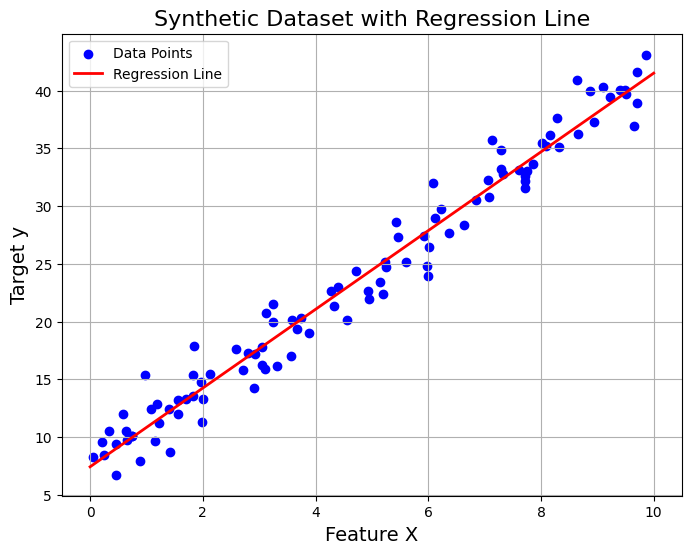

True line: y = 3.50x + 7.00
Predicted line: y = 3.41x + 7.43


In [47]:
# Step 1: Generate synthetic data
np.random.seed(42)
m = 100
X = np.random.rand(m, 1) * 10
true_w = 3.5
true_b = 7.0
noise = np.random.randn(m) * 2
y = true_w * X[:, 0] + true_b + noise

# Step 2: Train a simple Linear Regression (Gradient Descent or Normal Equation)
# For simplicity, we’ll use the normal equation here
X_b = np.c_[np.ones((m, 1)), X]  # add bias column
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
b_pred, w_pred = theta_best[0], theta_best[1]

# Step 3: Plot data points and regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data Points')

# Create line points
x_line = np.linspace(0, 10, 100)
y_line = w_pred * x_line + b_pred

plt.plot(x_line, y_line, color='red', linewidth=2, label='Regression Line')

# Step 4: Labels and legend
plt.title("Synthetic Dataset with Regression Line", fontsize=16)
plt.xlabel("Feature X", fontsize=14)
plt.ylabel("Target y", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

print(f"True line: y = {true_w:.2f}x + {true_b:.2f}")
print(f"Predicted line: y = {w_pred:.2f}x + {b_pred:.2f}")
